1.DEFINE
Title: Model Comparison of Rice Price Using Linear and Ridge Regression
Tools:Google Colab
Python libraries: pandas, numpy, matplotlib, seaborn, sklearn
Models:Linear Regression (Simple or Multiple)
Ridge Regression

purpose of the project: To analyze and compare the performance of linear regression and ridge regression models in predicting rice prices using historical data.

2.COLLECT DATA

In [1]:
#3.Load Data
from google.colab import files
uploaded = files.upload()


Saving imputed_processed_data.csv to imputed_processed_data.csv


In [2]:
# read data

import pandas as pd
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)
df.head()

,date,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
0,1996-01-01,18.07,7.75,7.90,8.18,1333.6,2065.1,53.685,12.4,77071,228090,73783,260481
1,1996-02-01,18.70,8.17,8.26,8.76,1333.6,2065.1,53.685,12.4,79586,234199,77440,269496
2,1996-03-01,18.49,7.95,7.85,7.99,1333.6,2065.1,53.685,12.4,82915,239178,81796,272552
3,1996-04-01,18.52,8.25,8.01,8.29,1333.6,2065.1,54.735,12.4,80873,241893,79478,278425
4,1996-05-01,19.02,8.38,8.50,8.34,731.5,2065.1,54.950,12.4,83410,242072,76620,277365


#4.Exploratory Data Analysis (EDA)
Check for missing values
Plot price over time
Examine correlation with features

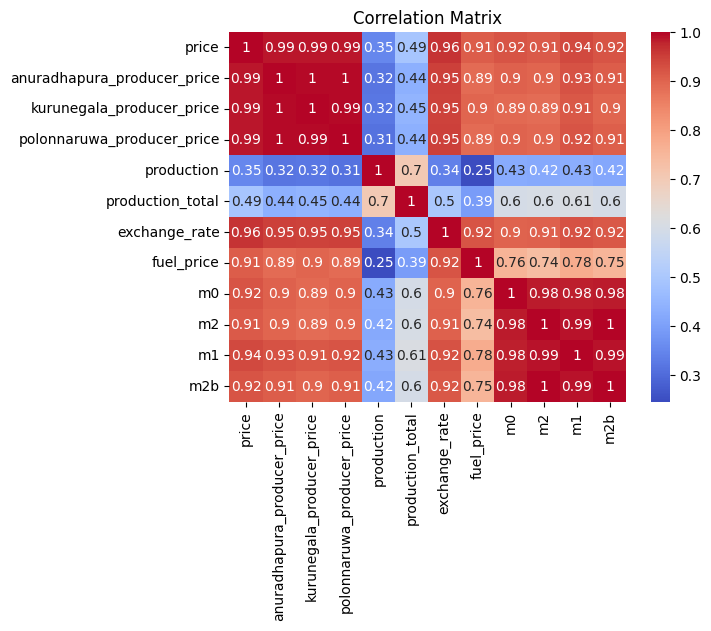

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'date' column before calculating the correlation
df_numeric = df.drop('date', axis=1)

sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The heatmap reveals that the producer prices are the most strongly positively correlated features with the rice price. Other factors like exchange rate, fuel price, and monetary supply also show positive correlations. Conversely, production levels appear to have a negative or weak relationship with price

The features that exhibited strong positive correlations with 'price' were:
anuradhapura_producer_price
kurunegala_producer_price
polonnaruwa_producer_price
exchange_rate
fuel_price
m0, m1, m2, m2b (monetary aggregates)

In [5]:
features = ['anuradhapura_producer_price', 'kurunegala_producer_price', 'polonnaruwa_producer_price',
            'exchange_rate', 'fuel_price', 'm0', 'm1', 'm2', 'm2b']
target = 'price'

X = df[features]
y = df[target]


5.Prepare Features & Target
Price is the our target
The features that exhibited strong positive correlations with 'price' were:   anuradhapura_producer_price , kurunegala_producer_price,polonnaruwa_producer_price, exchange_rate fuel_price, m0, m1, m2, m2b (monetary aggregates)

In [6]:
#6.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#7.Model 1 - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 13.6604984608883
R²: 0.9909543952490191


In [8]:
#8.Model 2 - Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))



Ridge Regression:
MSE: 13.662517926935266
R²: 0.9909530580143844


Compare Results
MSE and R² of both models
--Which one fits better?
--Does ridge help control overfitting?
--Is the difference significant?

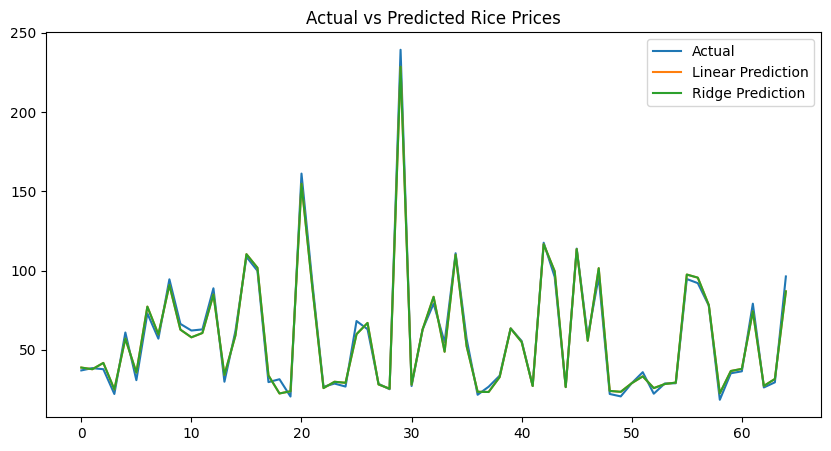

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Linear Prediction')
plt.plot(y_pred_ridge, label='Ridge Prediction')
plt.legend()
plt.title('Actual vs Predicted Rice Prices')
plt.show()

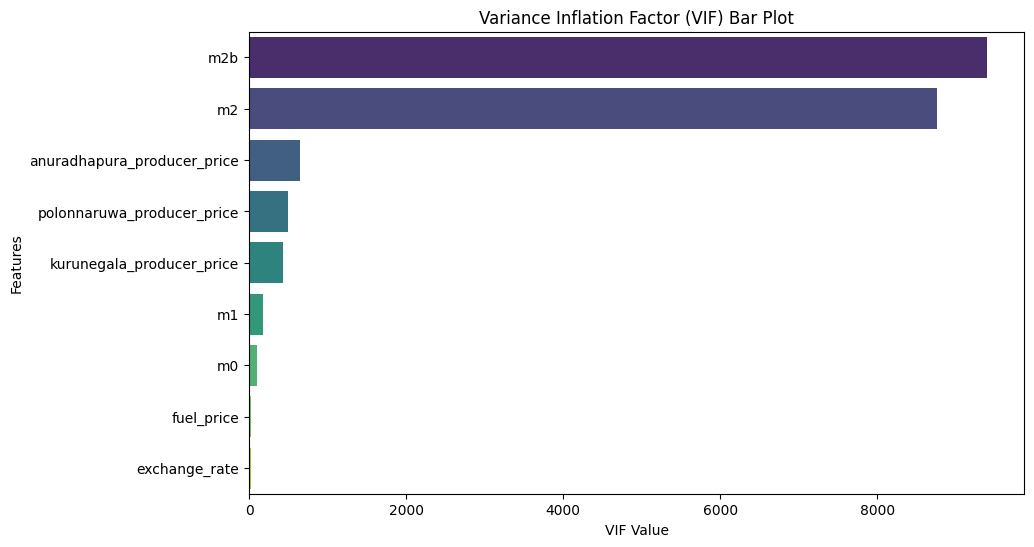

In [10]:
# prompt: 1. VIF Bar Plot (Variance Inflation Factor)
# Purpose: Visualize multicollinearity among predictors.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                           for i in range(len(X_train.columns))]

# Sort by VIF for better visualization
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, palette="viridis")
plt.title('Variance Inflation Factor (VIF) Bar Plot')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.show()

1. Linear Regression:    MSE: 13.6604984608883     R²: 0.9909543952490191
2.Ridge Regression:      MSE: 13.662517926935266   R²: 0.9909530580143844

**Conclusion:**

Looking at the provided MSE and R² values:

1.  **Linear Regression:** MSE: 13.66, R²: 0.991
2.  **Ridge Regression:** MSE: 13.66, R²: 0.991

Both models have very similar MSE and R² values, which are very close to 1. This indicates that both Linear and Ridge regression models performed exceptionally well in predicting rice prices on this dataset, with minimal difference in their performance based on these metrics.

Residuals vs Predicted Values (Scatter Plot)
Purpose: Check for patterns in the residuals (error terms) to validate assumptions of linearity and homoscedasticity.

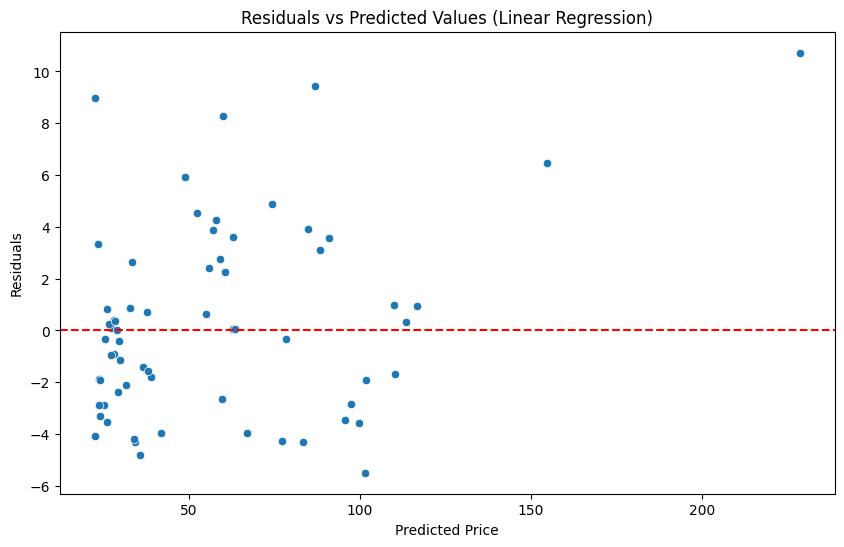

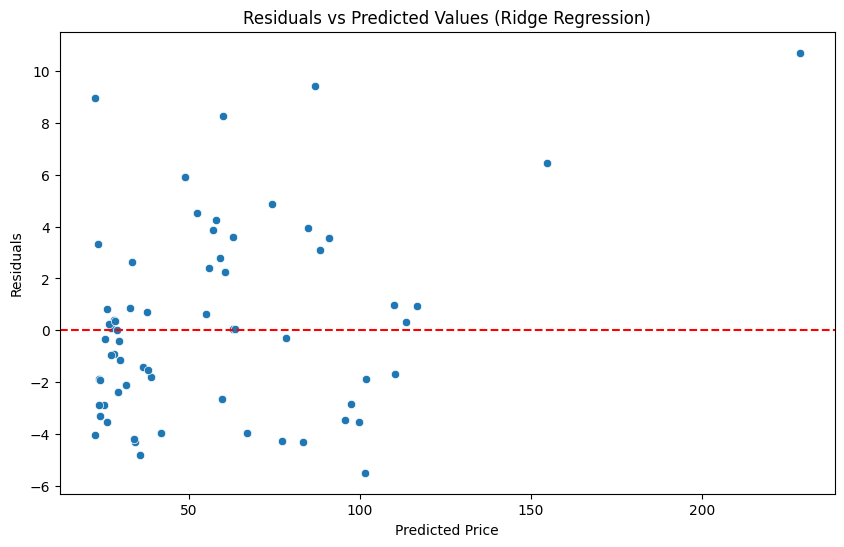

In [12]:
# Calculate residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

# Plot residuals vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (Linear Regression)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

# Calculate residuals for Ridge Regression
residuals_ridge = y_test - y_pred_ridge

# Plot residuals vs predicted for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (Ridge Regression)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

explanation..
In evaluating our regression models, we examined the residual plots to assess how well the models fit the data. Ideally, for a good linear model, residuals should be randomly scattered around the horizontal axis at zero, indicating homoscedasticity—meaning the variance of errors remains constant across all levels of predicted values. In our case, the residuals are generally centered around zero, but there are subtle signs of fanning out and slight curvature. These patterns may suggest mild heteroscedasticity or that a non-linear relationship exists in the data that our current models do not fully capture. Despite these minor deviations, the models still demonstrate strong predictive performance, as evidenced by high R² values close to 1. This indicates that the models explain a large proportion of the variance in rice prices. Therefore, while there may be opportunities to enhance the models using more advanced or non-linear techniques, our current linear approaches are already highly effective for the task at hand.

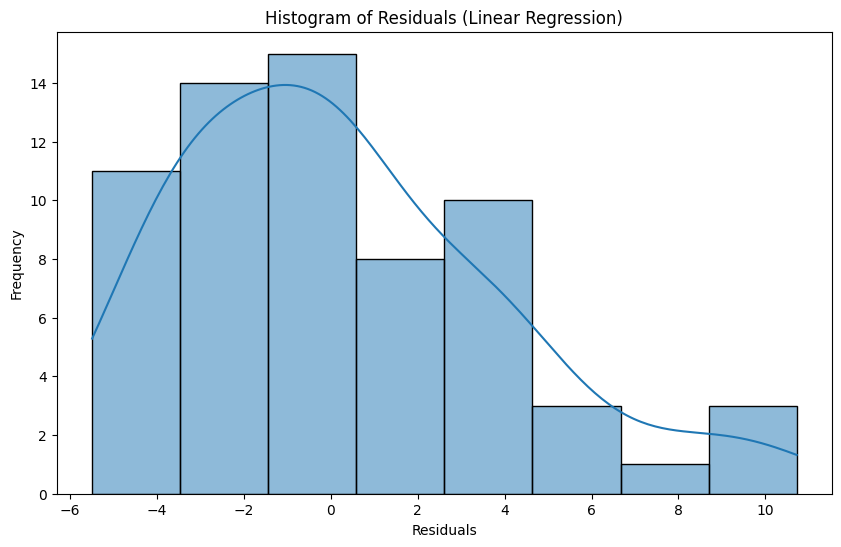

<Figure size 600x600 with 0 Axes>

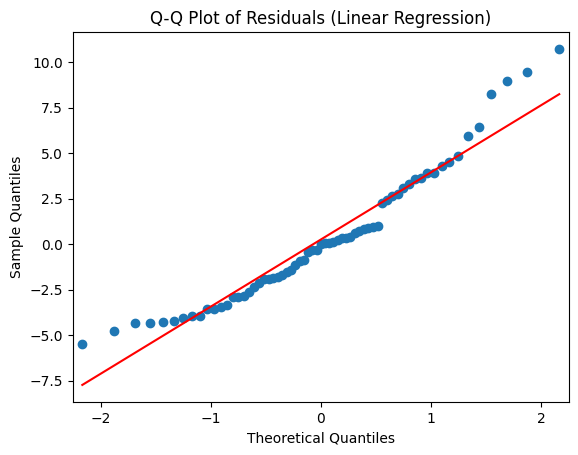

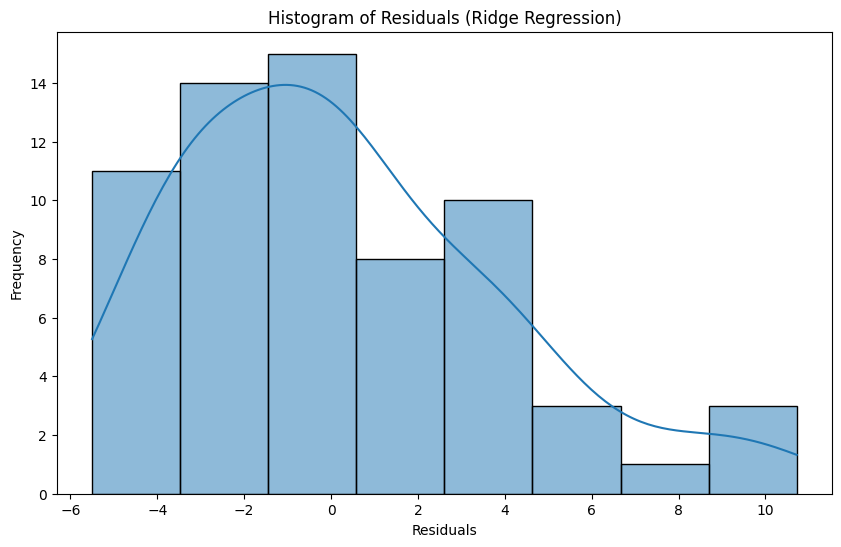

<Figure size 600x600 with 0 Axes>

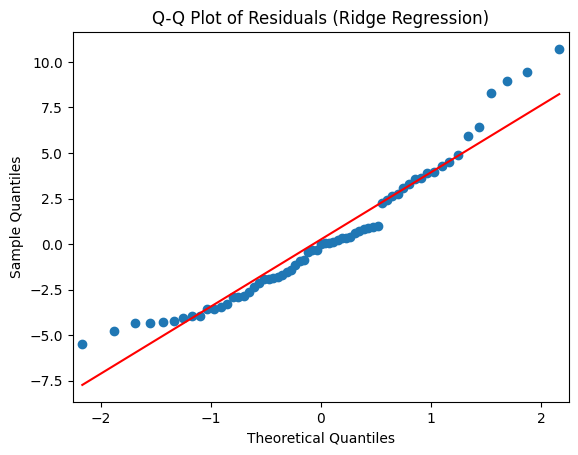

In [13]:
import statsmodels.api as sm

# Histogram of Residuals (Linear Regression)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, kde=True)
plt.title('Histogram of Residuals (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals (Linear Regression)
plt.figure(figsize=(6, 6))
sm.qqplot(residuals_lr, line='s')
plt.title('Q-Q Plot of Residuals (Linear Regression)')
plt.show()

# Histogram of Residuals (Ridge Regression)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, kde=True)
plt.title('Histogram of Residuals (Ridge Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals (Ridge Regression)
plt.figure(figsize=(6, 6))
sm.qqplot(residuals_ridge, line='s')
plt.title('Q-Q Plot of Residuals (Ridge Regression)')
plt.show()

Histogram + Q-Q Plot of Residuals
Purpose: Assess whether residuals (errors) are normally distributed — important for valid inference and error metrics.

The histogram and Q-Q plots show that the residuals are mostly normal, but with slight deviations in the tails. This means the assumption of perfectly normal errors isn't fully met, but the models are still very accurate overall.

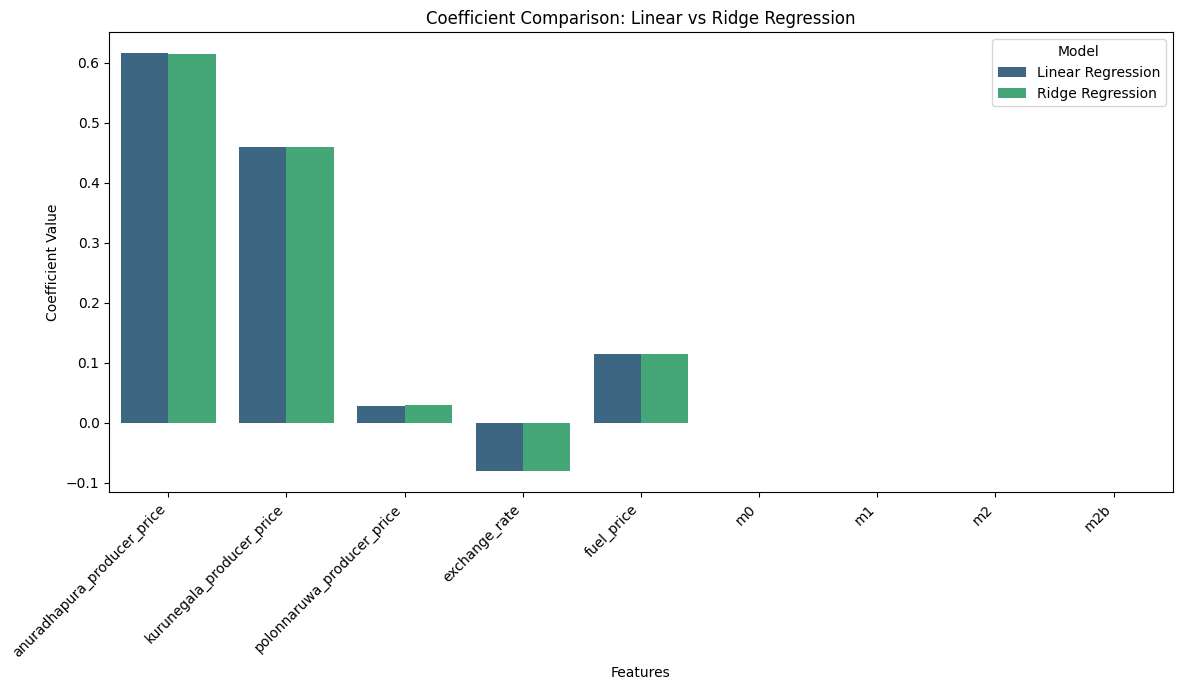

In [14]:
# Get coefficients from both models
coefficients_lr = lr_model.coef_
coefficients_ridge = ridge_model.coef_

# Create a DataFrame for easier plotting
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Linear Regression': coefficients_lr,
    'Ridge Regression': coefficients_ridge
})

# Reshape the DataFrame for plotting with seaborn
coefficients_melted = coefficients_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plot the coefficients
plt.figure(figsize=(12, 7))
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coefficients_melted, palette='viridis')
plt.title('Coefficient Comparison: Linear vs Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The coefficient comparison plot shows that Ridge Regression slightly reduced the size of the model's coefficients compared to normal Linear Regression. This means Ridge helped make the model a bit more stable, especially because some input variables were strongly related to each other. However, because the reduction was small, and the prediction results (MSE and R²) were almost the same, the effect of Ridge was not very strong. If we used a bigger penalty (higher alpha), Ridge would shrink the coefficients more clearly.